## Lab Session: Exploratory Data Analysis (EDA) on Heart Health Dataset


### Lab Task 1

In [124]:
#Importing the necessary modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [125]:
# Loading the dataset 
health_data = pd.read_csv('Data/heart_data.csv')

 _Inspecting the data_

In [126]:
# Viewing the top 10 rows of the data
health_data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [127]:
# Displaying summary statistics for all columns
health_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,heart_disease
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [128]:
# Viewing the shape of the data
data_rows,data_columns = health_data.shape
print(f"There are {data_rows} rows in the data")
print(f"There are {data_columns} columns in the data")

There are 303 rows in the data
There are 14 columns in the data


In [129]:
# Displaying the info of the data
health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    float64
 1   sex            303 non-null    float64
 2   cp             303 non-null    float64
 3   trestbps       303 non-null    float64
 4   chol           303 non-null    float64
 5   fbs            303 non-null    float64
 6   restecg        303 non-null    float64
 7   thalach        303 non-null    float64
 8   exang          303 non-null    float64
 9   oldpeak        303 non-null    float64
 10  slope          303 non-null    float64
 11  ca             303 non-null    object 
 12  thal           303 non-null    object 
 13  heart_disease  303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


## Task 2: Data Cleaning

### Handle Misrepresented Data in columns

In [130]:
# Checking the data types of each column
health_data.dtypes

age              float64
sex              float64
cp               float64
trestbps         float64
chol             float64
fbs              float64
restecg          float64
thalach          float64
exang            float64
oldpeak          float64
slope            float64
ca                object
thal              object
heart_disease      int64
dtype: object

In [131]:
# Viewing the count values in the fbs columns
health_data['fbs'].value_counts()

fbs
0.0    258
1.0     45
Name: count, dtype: int64

In [132]:
# The first 10 rows of the ca column
health_data['ca'].head(10)

0    0.0
1    3.0
2    2.0
3    0.0
4    0.0
5    0.0
6    2.0
7    0.0
8    1.0
9    0.0
Name: ca, dtype: object

In [133]:
# Viewing the values in the ca columns
health_data['ca'].value_counts()

ca
0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: count, dtype: int64

In [134]:
# Replacing ? with the mode
health_data['ca'].replace({'?':'0.0'},inplace=True)

In [135]:
# Changing the dtype of the ca column to float
health_data['ca'] = health_data['ca'].astype('float64')

In [136]:
# Viewing the thal column in the data
health_data['thal'].value_counts()

thal
3.0    166
7.0    117
6.0     18
?        2
Name: count, dtype: int64

In [137]:
# Replacing the ? in the thal values
health_data['thal'].replace({'?':'0.0'},inplace=True)

In [138]:
# Changing the dtype of the thal column to float
health_data['thal'] = health_data['ca'].astype('float64')

In [139]:
# Viewing the data types to confirm the changes made
health_data.dtypes

age              float64
sex              float64
cp               float64
trestbps         float64
chol             float64
fbs              float64
restecg          float64
thalach          float64
exang            float64
oldpeak          float64
slope            float64
ca               float64
thal             float64
heart_disease      int64
dtype: object

### Handling Missing values

In [140]:
# Checking for missing values
health_data.isnull().sum()

age              0
sex              0
cp               0
trestbps         0
chol             0
fbs              0
restecg          0
thalach          0
exang            0
oldpeak          0
slope            0
ca               0
thal             0
heart_disease    0
dtype: int64

### Handing Duplicates

In [141]:
# Checking for duplicates
health_data.duplicated().sum()

0

## Task 3: Univariate Analysis

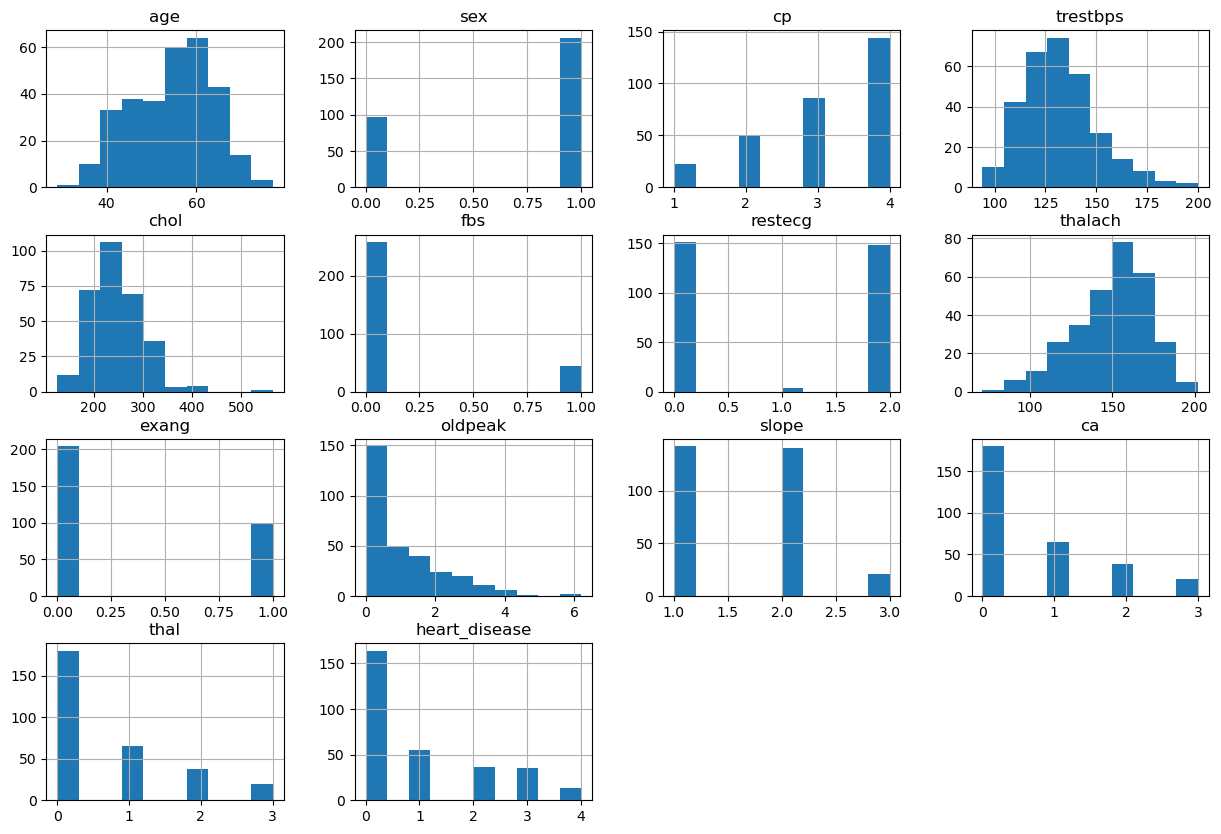

In [142]:
# Visualizing the distribution
health_data.hist(figsize=(15,10));

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


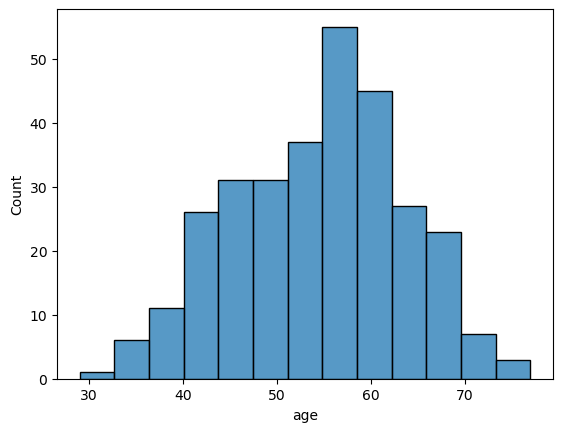

In [145]:
# Visualizing the age distribution
sns.histplot(x = 'age' ,data=health_data)
plt.show()

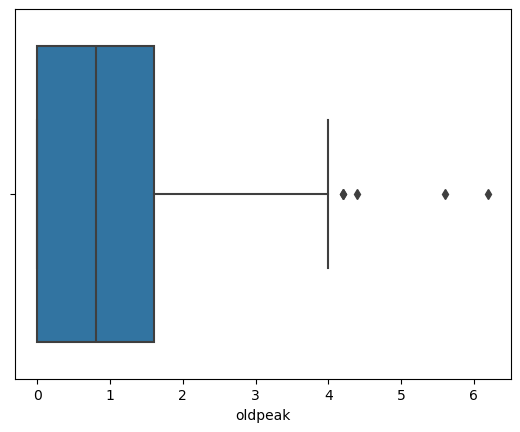

In [ ]:
# 
sns.boxplot(x = 'oldpeak' ,data=health_data)
plt.show()

In [ ]:
# 
